**Data Wrangling**

*AirBnB data - downloaded from http://insideairbnb.com/*

In [1]:
#Import pandas, and os for data inspection and wrangling

import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Load the detailed raw data. Data files in csv.gz format.

# Jersey City (jc) data
jc_calendar = pd.read_csv('../raw_data/Jersey City/calendar.csv.gz', compression = 'gzip', on_bad_lines='skip')
jc_listings = pd.read_csv('../raw_data/Jersey City/listings.csv.gz', compression = 'gzip', on_bad_lines='skip')
jc_reviews = pd.read_csv('../raw_data/Jersey City/reviews.csv')
jc_locale = pd.read_csv('../raw_data/Jersey City/neighbourhoods.csv')


# New York City (nyc) data
nyc_calendar = pd.read_csv('../raw_data/New York City/calendar.csv.gz', compression = 'gzip', on_bad_lines='skip')
nyc_listings = pd.read_csv('../raw_data/New York City/listings.csv.gz', compression = 'gzip', on_bad_lines='skip')
nyc_reviews = pd.read_csv('../raw_data/New York City/reviews.csv')
nyc_locale = pd.read_csv('../raw_data/New York City/neighbourhoods.csv')

# Rio (rio) data
rio_calendar = pd.read_csv('../raw_data/Rio/calendar.csv.gz', compression = 'gzip', on_bad_lines='skip')
rio_listings = pd.read_csv('../raw_data/Rio/listings.csv.gz', compression = 'gzip', on_bad_lines='skip')
rio_reviews = pd.read_csv('../raw_data/Rio/reviews.csv')
rio_locale = pd.read_csv('../raw_data/Rio/neighbourhoods.csv')


/var/folders/gj/nggxycj50vv7zds_fh4gtgjh0000gn/T/ipykernel_72472/1394471654.py:12: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_listings = pd.read_csv('../raw_data/New York City/listings.csv.gz', compression = 'gzip', on_bad_lines='skip')


Instecting the data 

In [3]:
#Jersey city data
print('jc_calendar info:')
jc_calendar.info() # 935.900 rows and 7 columns - mixed data types
print('\n jc_listings info:')
jc_listings.info() # 2.566 rows and 75 columns - mixed data types
print('\n jc_reviews info:')
jc_reviews.info() # 88.260 rows and 6 columns - mixed data types
print('\n jc_locale info:')
jc_locale.info() # 6 rowns and 2 columns

jc_calendar info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935900 entries, 0 to 935899
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      935900 non-null  int64  
 1   date            935900 non-null  object 
 2   available       935900 non-null  object 
 3   price           935729 non-null  object 
 4   adjusted_price  935729 non-null  object 
 5   minimum_nights  935177 non-null  float64
 6   maximum_nights  935177 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 50.0+ MB

 jc_listings info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2566 non-null   int64  
 1   listing_url                           

Jersey City data:

Calendar has 935.900 entries and 7 columns. There are prices on 935.729 entries and 935.177 entries mis minimum or maximum nights.

Listing has 2.566 entries and 75 columns. Neighourhood columns has 1590 entries. Not all listings has reviews.

Reviews has 88.260 entries and 6 columns. Comments has 88.237 entries.

Locale has 6 entries and 2 colums

In [4]:
jc_locale #inspecting Jersey city locales.


,neighbourhood_group,neighbourhood
0,NaN,Ward A (councilmember Denise Ridley)
1,NaN,Ward B (councilmember Mira Prinz-Arey)
2,NaN,Ward C (councilmember Richard Boggiano)
3,NaN,Ward D (councilmember Michael Yun)
4,NaN,Ward E (councilmember James Solomon)
5,NaN,Ward F (councilmember Jermaine D. Robinson)


In [5]:
jc_calendar.head(25)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,9329465,2022-09-18,f,$190.00,$190.00,3.0,1125.0
1,9329465,2022-09-19,f,$190.00,$190.00,3.0,1125.0
2,9329465,2022-09-20,f,$190.00,$190.00,3.0,1125.0
3,9329465,2022-09-21,f,$190.00,$190.00,3.0,1125.0
4,9329465,2022-09-22,f,$190.00,$190.00,3.0,1125.0
5,9329465,2022-09-23,f,$190.00,$190.00,3.0,1125.0
6,9329465,2022-09-24,f,$190.00,$190.00,3.0,1125.0
7,9329465,2022-09-25,f,$190.00,$190.00,3.0,1125.0
8,9329465,2022-09-26,f,$190.00,$190.00,3.0,1125.0
9,9329465,2022-09-27,f,$190.00,$190.00,3.0,1125.0


In [6]:
jc_calendar.tail(25)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
935875,16556296,2023-08-25,f,$163.00,$163.00,5.0,1125.0
935876,16556296,2023-08-26,f,$163.00,$163.00,5.0,1125.0
935877,16556296,2023-08-27,f,$163.00,$163.00,5.0,1125.0
935878,16556296,2023-08-28,f,$163.00,$163.00,5.0,1125.0
935879,16556296,2023-08-29,f,$163.00,$163.00,5.0,1125.0
935880,16556296,2023-08-30,f,$163.00,$163.00,5.0,1125.0
935881,16556296,2023-08-31,f,$163.00,$163.00,5.0,1125.0
935882,16556296,2023-09-01,f,$163.00,$163.00,5.0,1125.0
935883,16556296,2023-09-02,f,$163.00,$163.00,5.0,1125.0
935884,16556296,2023-09-03,f,$163.00,$163.00,5.0,1125.0


Calendar date start at 2022-09-18 and goes 12 month into the future to 2022-09-18. 

In [7]:
jc_reviews.head(10)

,listing_id,date
0,14175,2019-04-08
1,14175,2019-09-03
2,14175,2019-09-16
3,14175,2019-09-25
4,14175,2020-03-26
5,14175,2021-05-20
6,14175,2022-05-17
7,14175,2022-06-27
8,23686,2012-08-06
9,23686,2013-05-13


In [8]:
jc_listings.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,14175,23686,36703,40669,60164,71366,133832,171455,212109,215768
listing_url,https://www.airbnb.com/rooms/14175,https://www.airbnb.com/rooms/23686,https://www.airbnb.com/rooms/36703,https://www.airbnb.com/rooms/40669,https://www.airbnb.com/rooms/60164,https://www.airbnb.com/rooms/71366,https://www.airbnb.com/rooms/133832,https://www.airbnb.com/rooms/171455,https://www.airbnb.com/rooms/212109,https://www.airbnb.com/rooms/215768
scrape_id,20220918143915,20220918143915,20220918143915,20220918143915,20220918143915,20220918143915,20220918143915,20220918143915,20220918143915,20220918143915
last_scraped,2022-09-19,2022-09-19,2022-09-19,2022-09-18,2022-09-19,2022-09-19,2022-09-18,2022-09-19,2022-09-19,2022-09-19
source,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape,city scrape
name,10 Min To Manhattan - Nyc - Time Sq,West Village outdoor living private townhouse,"Sunny, clean 1 bdrm in W. Village",Skyy’s Lounge / Cozy,"Beautiful, elegant 3 bed SOHO loft",Beautiful One Bed West Village - 4 Month Special,Fab Luxury Condo Private and Quiet,Cozy Condo near NYC @ Great Value,2-bedroom share in heart of Greenwich Village!,Minutes to Manhattan & Jersey Shore
description,"3 bed, 1 bath, sleeps 6<br />Three bedroom apa...",August sale! Owner plans changed= unprecedent...,<b>The space</b><br />Location! Location! Sun...,<b>The space</b><br />Skyy’s Lounge ....Everyt...,An amazing 1500sq ft full 3 bedroom loft on th...,Building set up with Covid19 measures and prec...,2 Bedroom 2 Bath Excellent for longterm stays....,"Located in the heart of Hoboken, this safe and...","Large warm&homey apt: private bedrm; terrace, ...",Walking to distance to Statue of Liberty and E...
neighborhood_overview,The neighbors are very friendly. The neighborh...,"Restaurants: <br />Near the house, I love La L...","One black from The 1,9 subway. A short walk fr...",The neighborhood is very diverse & friendly sh...,"Great Neighborhood, right near all the action ...",Greenwich Village is a beautiful and charming ...,Diverse and fabulous shopping and restaurants ...,"Big city vibe complete with hip restaurants, c...",The neighborhood defines New York City's charm...,"Such close proximity to NYC, 7 minutes on the ..."
picture_url,https://a0.muscache.com/pictures/67218/c79fc91...,https://a0.muscache.com/pictures/16872151/eaba...,https://a0.muscache.com/pictures/455403/02e4d7...,https://a0.muscache.com/pictures/af7e4a45-0118...,https://a0.muscache.com/pictures/2b51b487-6b8b...,https://a0.muscache.com/pictures/ccc4409b-5cf9...,https://a0.muscache.com/pictures/83744060/3ca8...,https://a0.muscache.com/pictures/3324e10f-2f39...,https://a0.muscache.com/pictures/27fc53f4-dea2...,https://a0.muscache.com/pictures/miso/Hosting-...
host_id,55660,93790,158284,175412,289653,364955,618991,818109,666271,846837


In [9]:
#NY city data
print('nyc_calendar info:')
nyc_calendar.info() # 14.551.462 rows and 7 columns - mixed data types
print('\n nyc_listings info:')
nyc_listings.info() # 39.881 rows and 75 columns - mixed data types
print('\n nyc_reviews info:')
nyc_reviews.info() # 1.064.458 rows and 6 columns
print('\n nyc_locale info:')
nyc_locale.info() # 230 entries and 2 columns

nyc_calendar info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14551462 entries, 0 to 14551461
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 777.1+ MB

 nyc_listings info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39881 non-null  int64  
 1   listing_url                                   39881 non-null  object 
 2   scrape_id                                     39881 non-null  int64  
 3   last_scraped                    

In [10]:
nyc_calendar.head(25)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2539,2022-09-07,f,$299.00,$299.00,30.0,730.0
1,2539,2022-09-08,f,$299.00,$299.00,30.0,730.0
2,2539,2022-09-09,f,$299.00,$299.00,30.0,730.0
3,2539,2022-09-10,f,$299.00,$299.00,30.0,730.0
4,2539,2022-09-11,f,$299.00,$299.00,30.0,730.0
5,2539,2022-09-12,f,$299.00,$299.00,30.0,730.0
6,2539,2022-09-13,f,$299.00,$299.00,30.0,730.0
7,2539,2022-09-14,f,$299.00,$299.00,30.0,730.0
8,2539,2022-09-15,f,$299.00,$299.00,30.0,730.0
9,2539,2022-09-16,t,$299.00,$299.00,30.0,730.0


In [11]:
nyc_listings.head(5).T

,0,1,2,3,4
id,2539,2595,5121,45910,5136
listing_url,https://www.airbnb.com/rooms/2539,https://www.airbnb.com/rooms/2595,https://www.airbnb.com/rooms/5121,https://www.airbnb.com/rooms/45910,https://www.airbnb.com/rooms/5136
scrape_id,20220907064715,20220907064715,20220907064715,20220907064715,20220907064715
last_scraped,2022-09-07,2022-09-07,2022-09-07,2022-09-07,2022-09-07
source,city scrape,city scrape,city scrape,city scrape,city scrape
name,Clean & quiet apt home by the park,Skylit Midtown Castle,BlissArtsSpace!,Beautiful Queens Brownstone! - 5BR,"Spacious Brooklyn Duplex, Patio + Garden"
description,Renovated apt home in elevator building.<br />...,"Beautiful, spacious skylit studio in the heart...",One room available for rent in a 2 bedroom apt...,"<b>The space</b><br />Beautiful, fully furnish...",We welcome you to stay in our lovely 2 br dupl...
neighborhood_overview,Close to Prospect Park and Historic Ditmas Park,Centrally located in the heart of Manhattan ju...,NaN,NaN,NaN
picture_url,https://a0.muscache.com/pictures/3949d073-a02e...,https://a0.muscache.com/pictures/f0813a11-40b2...,https://a0.muscache.com/pictures/2090980c-b68e...,https://a0.muscache.com/pictures/27117627/19ff...,https://a0.muscache.com/pictures/miso/Hosting-...
host_id,2787,2845,7356,204539,7378


In [12]:
nyc_locale # NYC data has the boroughs and neighbourhood

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill
5,Bronx,City Island
6,Bronx,Claremont Village
7,Bronx,Clason Point
8,Bronx,Concourse
9,Bronx,Concourse Village


In [13]:
#Rio data
print('rio_calendar info:')
rio_calendar.info() # 9.623.164 rows and 7 columns - mixed data types
print('\n rio_listings info:')
rio_listings.info() # 26.366 rows and 75 cpolumns - mixed data types
print('\n rio_reviews info:')
rio_reviews.info() # 458.439 rows and 6 columns
print('\n rio_locale info:')
rio_locale.info() # 160 entries and 2 columns

rio_calendar info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9623164 entries, 0 to 9623163
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 513.9+ MB

 rio_listings info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26366 entries, 0 to 26365
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26366 non-null  int64  
 1   listing_url                                   26366 non-null  object 
 2   scrape_id                                     26366 non-null  int64  
 3   last_scraped                      

In [14]:
rio_calendar.head(25)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,53344884,2022-09-22,t,"$3,500.00","$3,500.00",3.0,365.0
1,53344884,2022-09-23,t,"$3,500.00","$3,500.00",3.0,365.0
2,53344884,2022-09-24,t,"$3,500.00","$3,500.00",3.0,365.0
3,53344884,2022-09-25,t,"$3,500.00","$3,500.00",3.0,365.0
4,53344884,2022-09-26,t,"$3,500.00","$3,500.00",3.0,365.0
5,53344884,2022-09-27,t,"$3,500.00","$3,500.00",3.0,365.0
6,53344884,2022-09-28,t,"$3,500.00","$3,500.00",3.0,365.0
7,53344884,2022-09-29,t,"$3,500.00","$3,500.00",3.0,365.0
8,53344884,2022-09-30,t,"$3,500.00","$3,500.00",3.0,365.0
9,53344884,2022-10-01,t,"$1,900.00","$1,900.00",3.0,365.0


In [15]:
rio_listings.head(5).T

,0,1,2,3,4
id,53344884,7801456,14333905,44708736,35351763
listing_url,https://www.airbnb.com/rooms/53344884,https://www.airbnb.com/rooms/7801456,https://www.airbnb.com/rooms/14333905,https://www.airbnb.com/rooms/44708736,https://www.airbnb.com/rooms/35351763
scrape_id,20220921172238,20220921172238,20220921172238,20220921172238,20220921172238
last_scraped,2022-09-22,2022-09-22,2022-09-22,2022-09-22,2022-09-22
source,city scrape,city scrape,city scrape,city scrape,city scrape
name,Suntuoso apartamento em Copacabana posto 6,Ipanema Vieira Souto - Linda Vista,Casa compartilhada,Aluguel de Lancha no Rio de Janeiro,Uma grande família
description,suntuoso apartamento de frente para o mar <br ...,Flat luxuoso com a melhor localização do Rio d...,"A 15 min. do complexo esportivo de Deodoro, Ca...",Iate Intermarine 440 Full Gold c/ Fly p/ até 1...,"Estou oferecendo minha casa ,minha família meu..."
neighborhood_overview,NaN,"Ipanema é considerado o berço do rio, cheio de...",NaN,A Marina da Glória fica no bairro do Flamengo ...,São Mateus
picture_url,https://a0.muscache.com/pictures/miso/Hosting-...,https://a0.muscache.com/pictures/99276394/dc9c...,https://a0.muscache.com/pictures/15235501-16c4...,https://a0.muscache.com/pictures/210e9877-2854...,https://a0.muscache.com/pictures/44713611-925b...
host_id,431412286,40650139,87749071,97164727,249666532


In [16]:
# Calculating missing data in listings
missing = pd.concat([jc_listings.isnull().sum(), 100 * jc_listings.isnull().mean(),nyc_listings.isnull().sum(), 100 * nyc_listings.isnull().mean(),rio_listings.isnull().sum(), 100 * rio_listings.isnull().mean()], axis=1)
missing.columns=['count_jc', '%','count_nyc', '%','count_rio', '%']
missing.sort_values(by='count_jc')

,count_jc,%,count_nyc,%,count_rio,%
id,0,0.000000,0,0.000000,0,0.000000
neighbourhood_cleansed,0,0.000000,0,0.000000,0,0.000000
number_of_reviews_ltm,0,0.000000,0,0.000000,0,0.000000
latitude,0,0.000000,0,0.000000,0,0.000000
longitude,0,0.000000,0,0.000000,0,0.000000
property_type,0,0.000000,0,0.000000,0,0.000000
room_type,0,0.000000,0,0.000000,0,0.000000
accommodates,0,0.000000,0,0.000000,0,0.000000
number_of_reviews,0,0.000000,0,0.000000,0,0.000000
calculated_host_listings_count_shared_rooms,0,0.000000,0,0.000000,0,0.000000


Several items have a large proportion of null variable for all three data sets. For the columns of interest Bathroom do not have entries, however bathroom_text have very fill missing values. In addition, large portion of listins do not have Neighourhood information. There are missing reviews on listings, which could be new listings that do not have reviews yet.

Drop bathrooms, calendar_updated, license, host_neighbourhood, host_about, neighborhood_overview, neighbourhood, and host_location columns. Delete listings with host_name and bathrooms_text null entries.

In [17]:
# Drop columns with large quantity of null entries
drop_col = ['bathrooms', 'calendar_updated', 'license', 'host_neighbourhood', 'host_about', 'neighborhood_overview', 'neighbourhood', 'host_location']

jc_listings.drop(columns = drop_col, inplace = True)
nyc_listings.drop(columns = drop_col, inplace = True)
rio_listings.drop(columns = drop_col, inplace = True)

In [18]:
# Delete listings with null entries for bathrooms_text and host_name
subset_col = ['host_name', 'bathrooms_text']

jc_listings.dropna(subset = subset_col, inplace = True)
nyc_listings.dropna(subset = subset_col, inplace = True)
rio_listings.dropna(subset = subset_col, inplace = True)

In [19]:
# inspecting the data set
jc_listings.info() #2.561 rows and 67 columns
nyc_listings.info() # 39.747 rows and 67 columns
rio_listings.info() # 26.311 rows and 67 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2561 entries, 0 to 2565
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2561 non-null   int64  
 1   listing_url                                   2561 non-null   object 
 2   scrape_id                                     2561 non-null   int64  
 3   last_scraped                                  2561 non-null   object 
 4   source                                        2561 non-null   object 
 5   name                                          2561 non-null   object 
 6   description                                   2523 non-null   object 
 7   picture_url                                   2561 non-null   object 
 8   host_id                                       2561 non-null   int64  
 9   host_url                                      2561 non-null   o

*Numerical Features*

Neighbourhood listing distributions

In [20]:
# Jesey City listing distributions

jc_listings['neighbourhood_cleansed'].value_counts()

Ward E (councilmember James Solomon)           1076
Ward D (councilmember Michael Yun)              615
Ward F (councilmember Jermaine D. Robinson)     416
Ward C (councilmember Richard Boggiano)         215
Ward A (councilmember Denise Ridley)            134
Ward B (councilmember Mira Prinz-Arey)          105
Name: neighbourhood_cleansed, dtype: int64

The highest listing (Ward E) is the locale closest to Manhattan. This suggest price sensitive renters are looking for a convinient commute to Manhattan but without the price tag.

In [21]:
# New Yourk City listing boroughs distributions

nyc_listings['neighbourhood_group_cleansed'].value_counts()

Manhattan        16748
Brooklyn         14817
Queens            6170
Bronx             1566
Staten Island      446
Name: neighbourhood_group_cleansed, dtype: int64

In [22]:
# New Yourk City listing neighbourhood distributions

nyc_listings.groupby('neighbourhood_group_cleansed')['neighbourhood_cleansed'].value_counts()

neighbourhood_group_cleansed  neighbourhood_cleansed      
Bronx                         Wakefield                        192
                              Mott Haven                        91
                              Kingsbridge                       75
                              Williamsbridge                    70
                              Longwood                          67
                              Fordham                           63
                              Concourse                         52
                              Parkchester                       46
                              Allerton                          45
                              Claremont Village                 45
                              Clason Point                      39
                              Port Morris                       39
                              North Riverdale                   38
                              Concourse Village                 37
   

Manhattan and Brooklyin have the majority of listings. Astoria (Queens) is very close to Manhattan, therefore has a large number of listings.

In [23]:
# Rio listing distributions

rio_listings['neighbourhood_cleansed'].value_counts()

Copacabana                  7525
Barra da Tijuca             2723
Ipanema                     2603
Jacarepaguá                 1457
Recreio dos Bandeirantes    1327
Leblon                      1262
Botafogo                    1115
Santa Teresa                 918
Centro                       689
Flamengo                     568
Leme                         481
Laranjeiras                  396
Tijuca                       392
Camorim                      303
Lagoa                        218
Glória                       208
São Conrado                  195
Gávea                        189
Catete                       180
Jardim Botânico              172
Vidigal                      153
Humaitá                      148
Taquara                      138
Itanhangá                    132
Freguesia (Jacarepaguá)      130
Vila Isabel                  128
Barra de Guaratiba           126
Maracanã                     123
Joá                          116
Vargem Pequena               104
Urca      

Rio listings are concentrated in Zona Sul (Copacabana, Ipanema, Leblon, Botafogo, Flamengo, and Leme) and Zona Oeste (Barra da Tijuca, Jacarepaquá, and Recreio dos Bandeirantes)

*Number of beds per neighbourhood*

In [25]:
jc_listings.groupby(['neighbourhood_cleansed','bedrooms']).size()

neighbourhood_cleansed                       bedrooms
Ward A (councilmember Denise Ridley)         1.0          72
                                             2.0          23
                                             3.0          24
                                             4.0           6
                                             5.0           1
                                             6.0           1
                                             7.0           1
Ward B (councilmember Mira Prinz-Arey)       1.0          58
                                             2.0          25
                                             3.0          16
                                             4.0           3
Ward C (councilmember Richard Boggiano)      1.0         113
                                             2.0          45
                                             3.0          20
                                             4.0           6
                               

In [26]:
nyc_listings.groupby(['neighbourhood_group_cleansed','bedrooms']).size()

neighbourhood_group_cleansed  bedrooms
Bronx                         1.0          1140
                              2.0           223
                              3.0            85
                              4.0            25
                              5.0             4
                              11.0            1
Brooklyn                      1.0         10207
                              2.0          2499
                              3.0           968
                              4.0           224
                              5.0            61
                              6.0            19
                              7.0             5
                              8.0             3
                              9.0             2
Manhattan                     1.0         10827
                              2.0          2485
                              3.0           687
                              4.0           188
                              5.0            37
 

In [27]:
rio_listings.groupby(['neighbourhood_cleansed','bedrooms']).size()

neighbourhood_cleansed    bedrooms
Abolição                  1.0            2
                          2.0            2
Acari                     2.0            1
Alto da Boa Vista         1.0           18
                          2.0            9
                          3.0            3
                          4.0            2
                          5.0            2
                          6.0            2
Anchieta                  1.0            1
                          3.0            1
Andaraí                   1.0           21
                          2.0           12
                          3.0            1
                          4.0            1
Anil                      1.0           31
                          2.0           11
                          3.0            4
                          4.0            1
                          5.0            2
Bancários                 1.0            2
                          2.0            3
Bangu              

For the three cities, most of the listings offer 1 or 2 bedrooms. Some neighbourhood have some listings with higher number of bedrooms.

In [28]:
types = pd.concat([jc_listings['property_type'].value_counts(), jc_listings['property_type'].value_counts(normalize=True),nyc_listings['property_type'].value_counts(), nyc_listings['property_type'].value_counts(normalize=True),rio_listings['property_type'].value_counts(), rio_listings['property_type'].value_counts(normalize=True)], axis=1)
types.columns = ['Jersey City', '%', 'NYC', '%', 'Rio','%']

types

,Jersey City,%,NYC,%,Rio,%
Entire rental unit,1270.0,0.495900,16830.0,0.423428,14811.0,0.562920
Private room in rental unit,222.0,0.086685,10443.0,0.262737,3141.0,0.119380
Entire condo,210.0,0.081999,1625.0,0.040884,1984.0,0.075406
Entire serviced apartment,204.0,0.079656,614.0,0.015448,864.0,0.032838
Private room in home,150.0,0.058571,2129.0,0.053564,996.0,0.037855
Room in hotel,134.0,0.052323,658.0,0.016555,147.0,0.005587
Entire home,76.0,0.029676,1468.0,0.036934,1174.0,0.044620
Entire loft,74.0,0.028895,746.0,0.018769,811.0,0.030824
Private room in condo,52.0,0.020305,598.0,0.015045,472.0,0.017939
Entire townhouse,38.0,0.014838,659.0,0.016580,22.0,0.000836


There are many types of properties listed. There are several types that have very few units listed. 

In [24]:
room_types = pd.concat([jc_listings['room_type'].value_counts(), jc_listings['room_type'].value_counts(normalize=True),nyc_listings['room_type'].value_counts(), nyc_listings['room_type'].value_counts(normalize=True),rio_listings['room_type'].value_counts(), rio_listings['room_type'].value_counts(normalize=True)], axis=1)
room_types.columns = ['Jersey City', '%', 'NYC', '%', 'Rio','%']

room_types

,Jersey City,%,NYC,%,Rio,%
Entire home/apt,1917,0.748536,22724,0.571716,20210,0.768120
Private room,609,0.237798,16301,0.410119,5557,0.211204
Hotel room,33,0.012886,170,0.004277,51,0.001938
Shared room,2,0.000781,552,0.013888,493,0.018737


In contract, 'room_type' has only four categorical values, which are the same for all cities. There are very few entries of shares room and hotel room. Therefore we will delete these entries and the 'property_type' column.

In [25]:
r_types = ['Entire home/apt', 'Private room'] # Keep 'Entire home/apt' and 'Private room' room types

jc_listings = jc_listings[jc_listings['room_type'].isin(r_types)]
nyc_listings = nyc_listings[nyc_listings['room_type'].isin(r_types)]
rio_listings = rio_listings[rio_listings['room_type'].isin(r_types)]

In [26]:
jc_listings.info()
nyc_listings.info()
rio_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526 entries, 0 to 2565
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            2526 non-null   int64  
 1   listing_url                                   2526 non-null   object 
 2   scrape_id                                     2526 non-null   int64  
 3   last_scraped                                  2526 non-null   object 
 4   source                                        2526 non-null   object 
 5   name                                          2526 non-null   object 
 6   description                                   2488 non-null   object 
 7   picture_url                                   2526 non-null   object 
 8   host_id                                       2526 non-null   int64  
 9   host_url                                      2526 non-null   o

In [27]:
# Drop Columns, which will not be used in pricing modeling.

cols_drop = ['listing_url','scrape_id','last_scraped','source','name', 'picture_url', 'host_id','host_url','host_name','host_thumbnail_url','host_picture_url','host_has_profile_pic','calendar_last_scraped']

jc_listings.drop(columns = cols_drop, inplace = True)
nyc_listings.drop(columns = cols_drop, inplace = True)
rio_listings.drop(columns = cols_drop, inplace = True)

*Median Price per neighbourhood*

In [28]:
# Converting price column from string to a float
jc_listings['price'] = jc_listings.price.replace({'\$': '', ',': ''},regex=True).astype(float)
nyc_listings['price'] = nyc_listings.price.replace({'\$': '', ',': ''},regex=True).astype(float)
rio_listings['price'] = rio_listings.price.replace({'\$': '', ',': ''},regex=True).astype(float)


In [29]:
nyc_listings['price'].info() # inspecting if the result is correct

<class 'pandas.core.series.Series'>
Int64Index: 39025 entries, 0 to 39880
Series name: price
Non-Null Count  Dtype  
--------------  -----  
39025 non-null  float64
dtypes: float64(1)
memory usage: 609.8 KB


In [30]:
jc_listings.groupby(['neighbourhood_cleansed','bedrooms'])['price'].describe()

count         mean  \
neighbourhood_cleansed                      bedrooms                       
Ward A (councilmember Denise Ridley)        1.0        71.0    90.211268   
                                            2.0        23.0   165.217391   
                                            3.0        24.0   221.208333   
                                            4.0         6.0   401.000000   
                                            5.0         1.0   198.000000   
                                            6.0         1.0   421.000000   
                                            7.0         1.0   302.000000   
Ward B (councilmember Mira Prinz-Arey)      1.0        58.0   101.120690   
                                            2.0        25.0   143.000000   
                                            3.0        16.0   182.250000   
                                            4.0         3.0   158.000000   
Ward C (councilmember Richard Boggiano)     1.0       112.0    84.500000   
                                            2.0        45.0   154.977778   
                                            3.0        20.0   271.450000   
                                            4.0         6.0   273.500000   
                                            5.0         1.0   253.000000   
                                            7.0         1.0   999.000000   
Ward D (councilmember Michael Yun)          1.0       283.0   106.077739   
                                            2.0       225.0   184.346667   
                                            3.0        56.0   262.428571   
                                            4.0        14.0   303.928571   
                                            5.0         6.0   490.333333   
                                            6.0         1.0  1500.000000   
                                            9.0         1.0  1000.000000   
Ward E (councilmember James Solomon)        1.0       624.0   440.190705   
                                            2.0       220.0   449.004545   
                                            3.0        50.0   899.080000   
                                            4.0        27.0  1603.740741   
                                            5.0         4.0  1267.500000   
                                            6.0         2.0  1412.500000   
                                            8.0         1.0  1500.000000   
Ward F (councilmember Jermaine D. Robinson) 1.0       272.0   268.371324   
                                            2.0        52.0   250.692308   
                                            3.0        30.0   297.166667   
                                            4.0         6.0   716.166667   
                                            5.0         2.0   424.000000   
                                            8.0         1.0   467.000000   
                                            10.0        1.0   570.000000   

                                                              std     min  \
neighbourhood_cleansed                      bedrooms                        
Ward A (councilmember Denise Ridley)        1.0         60.809754    26.0   
                                            2.0         85.434162    50.0   
                                            3.0         90.921361   116.0   
                                            4.0        150.894665   180.0   
                                            5.0               NaN   198.0   
                                            6.0               NaN   421.0   
                                            7.0               NaN   302.0   
Ward B (councilmember Mira Prinz-Arey)      1.0         83.513856    28.0   
                                            2.0         57.214509    60.0   
                                            3.0         87.873014    74.0   
                                            4.0         72.297994   100.0   
Ward C (coun

In [31]:
nyc_listings.groupby(['neighbourhood_group_cleansed','bedrooms'])['price'].describe()

count         mean          std  \
neighbourhood_group_cleansed bedrooms                                      
Bronx                        1.0        1102.0   101.939201   309.971161   
                             2.0         223.0   160.134529    70.826840   
                             3.0          85.0   246.329412   121.994476   
                             4.0          25.0   257.200000   117.229120   
                             5.0           4.0   681.250000   889.834957   
                             11.0          1.0    66.000000          NaN   
Brooklyn                     1.0       10031.0   116.230685   151.045584   
                             2.0        2499.0   223.127251   200.644533   
                             3.0         968.0   309.247934   308.170484   
                             4.0         224.0   442.843750   427.338145   
                             5.0          61.0   684.524590   663.016405   
                             6.0          19.0   932.894737   877.888306   
                             7.0           5.0   882.000000   381.057082   
                             8.0           3.0   914.666667   248.576615   
                             9.0           2.0   871.000000   181.019336   
Manhattan                    1.0       10439.0   209.761376   378.075506   
                             2.0        2483.0   373.290375   522.392819   
                             3.0         687.0   552.807860   546.994229   
                             4.0         187.0  1062.299465  1487.797078   
                             5.0          37.0  1471.945946  1835.535449   
                             6.0          13.0  1416.615385  1010.105072   
                             7.0           2.0  1717.500000  1530.886181   
                             8.0           1.0  2243.000000          NaN   
                             9.0           1.0   900.000000          NaN   
                             13.0          1.0   410.000000          NaN   
Queens                       1.0        4337.0    96.947890   161.060140   
                             2.0         878.0   202.402050   360.230525   
                             3.0         439.0   258.252847   133.085571   
                             4.0          79.0   423.189873   292.677738   
                             5.0          17.0   624.823529   435.064828   
                             6.0           8.0   504.500000   207.105218   
                             7.0           1.0   667.000000          NaN   
                             8.0           2.0   957.500000   111.015765   
Staten Island                1.0         271.0    96.350554    61.732808   
                             2.0          74.0   138.756757    41.452006   
                             3.0          55.0   262.272727   343.696111   
                             4.0          16.0   426.812500   565.602831   
                             5.0           4.0   426.250000   211.523639   
                             7.0           2.0   808.000000     2.828427   
                             8.0           1.0   850.000000          NaN   

                                          min      25%     50%      75%  \
neighbourhood_group_cleansed bedrooms                                     
Bronx                        1.0         20.0    59.00    75.0   105.00   
                             2.0         11.0   120.00   145.0   187.00   
                             3.0         67.0   185.00   225.0   275.00   
                             4.0         30.0   180.00   266.0   350.00   
                             5.0         65.0   211.25   330.0   800.00   
                             11.0        66.0    66.00    66.0    66.00   
Brooklyn                     1.0         10.0    60.00    90.0   142.00   
                             2.0         10.0   140.00   190.0   256.50   
                             3.0         28.0   178.00   250.0   356.00   
                       

In [32]:
rio_listings.groupby(['neighbourhood_cleansed','bedrooms'])['price'].describe()

count          mean           std  \
neighbourhood_cleansed   bedrooms                                       
Abolição                 1.0          1.0     85.000000           NaN   
                         2.0          2.0    525.000000    388.908730   
Acari                    2.0          1.0    250.000000           NaN   
Alto da Boa Vista        1.0         17.0   1019.411765   1749.894535   
                         2.0          9.0    698.111111    723.064044   
                         3.0          3.0   4669.000000   6372.053280   
                         4.0          2.0   5543.000000   6303.149847   
                         5.0          2.0   6900.000000   7212.489168   
                         6.0          2.0    950.000000    353.553391   
Anchieta                 3.0          1.0   4640.000000           NaN   
Andaraí                  1.0         20.0    270.700000    442.182756   
                         2.0         12.0   1841.000000   4791.178580   
                         3.0          1.0   9372.000000           NaN   
                         4.0          1.0    500.000000           NaN   
Anil                     1.0         29.0  11770.068966  62185.878916   
                         2.0         11.0    620.545455    688.217024   
                         3.0          4.0   1637.500000    754.293267   
                         4.0          1.0   2000.000000           NaN   
                         5.0          2.0   1450.000000   1767.766953   
Bancários                1.0          2.0    312.500000    280.721392   
                         2.0          3.0    142.666667     41.428654   
Bangu                    1.0          5.0    176.400000    138.505596   
                         2.0          3.0   3833.333333   5340.489990   
                         3.0          3.0    331.000000    321.211768   
                         4.0          1.0   1700.000000           NaN   
Barra da Tijuca          1.0       1250.0    566.650400   1782.809763   
                         2.0        843.0    801.720047   1035.478127   
                         3.0        308.0   1357.558442   1372.115004   
                         4.0        134.0   2577.313433   1963.254649   
                         5.0         55.0   5235.563636   8395.494801   
                         6.0         19.0   7014.421053   8413.416470   
                         7.0          7.0   8258.000000   4893.836293   
                         8.0          3.0   5885.666667   1387.845933   
                         9.0          3.0   7866.666667   2800.148806   
                         10.0         1.0  11000.000000           NaN   
                         11.0         1.0   7889.000000           NaN   
Barra de Guaratiba       1.0         73.0    322.410959    275.263149   
                         2.0         26.0    492.961538    244.843702   
                         3.0          8.0    888.375000    491.842001   
                         4.0          1.0   1057.000000           NaN   
                         5.0          2.0  23824.500000  31925.164064   
                         6.0          7.0    965.000000     66.143783   
                         8.0          1.0   8000.000000           NaN   
                         12.0         1.0    600.000000           NaN   
Barros Filho             1.0          1.0    500.000000           NaN   
Benfica                  1.0          5.0     75.800000     16.376813   
                         2.0          2.0     93.000000     33.941125   
                         3.0          1.0   1000.000000           NaN   
Bento Ribeiro            1.0          5.0    107.600000     37.467319   
                         2.0          1.0    128.000000           NaN   
                         4.0          1.0   1547.000000           NaN   
Bonsucesso               1.0         17.0    118.235294    109.699322   
                         2.0          1.0   1500.000000           NaN   
Botafogo             

There are a significant difference between listing based on neighbourhood in Jersey City. The price difference is less pronounce for multiple beds listings. New York City and Rio listings has a lower price difference between neighbourhoods, except for high price neighbourhoods such as Manhattan, Ipanema, and Leblon.

In [49]:
jc_listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2526.0,1.544595e+17,2.748946e+17,14175.00000,2.893289e+07,4.557910e+07,5.409450e+07,7.179196e+17
host_listings_count,2526.0,2.062989e+02,7.869126e+02,1.00000,1.000000e+00,4.000000e+00,4.000000e+01,4.075000e+03
host_total_listings_count,2526.0,2.509620e+02,8.617413e+02,1.00000,2.000000e+00,7.000000e+00,6.300000e+01,4.399000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,2526.0,4.072850e+01,2.002542e-02,40.66475,4.071349e+01,4.072632e+01,4.074146e+01,4.078901e+01
longitude,2526.0,-7.403694e+01,2.747845e-02,-74.11457,-7.405171e+01,-7.403642e+01,-7.400846e+01,-7.399984e+01
accommodates,2526.0,3.725653e+00,2.512612e+00,1.00000,2.000000e+00,3.000000e+00,5.000000e+00,1.600000e+01
bedrooms,2292.0,1.561518e+00,8.982076e-01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
beds,2465.0,2.043813e+00,1.438861e+00,1.00000,1.000000e+00,2.000000e+00,3.000000e+00,1.400000e+01
price,2526.0,3.145847e+02,2.020683e+03,20.00000,1.100000e+02,1.835000e+02,3.330000e+02,9.999900e+04


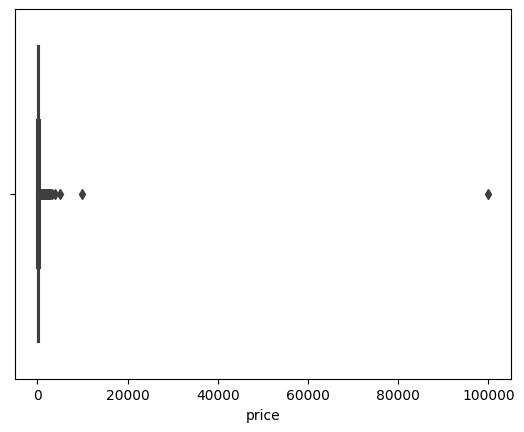

In [33]:
# Identifying outliers

sns.boxplot(x='price', data=jc_listings)
plt.show()

In [34]:
# There are two listings over USD 5000 per night, we will treat them as outliers and remove from the data set.

jc_listings[jc_listings['price'] >= 5000].T 

,1800,1905
id,52862058,53775685
description,Luxury studio located right on Wall Street. Ju...,房间配备家具齐全，具有独立的工作空间。房间内拥有独立的洗烘设备
host_since,2016-02-06,2019-02-25
host_response_time,within a few hours,within an hour
host_response_rate,100%,100%
host_acceptance_rate,38%,100%
host_is_superhost,f,f
host_listings_count,1,8
host_total_listings_count,2,14
host_verifications,"['email', 'phone', 'work_email']","['email', 'phone']"


In [65]:
jc_listings = jc_listings[jc_listings['price'] <= 5000] # filter for price bellow 5K

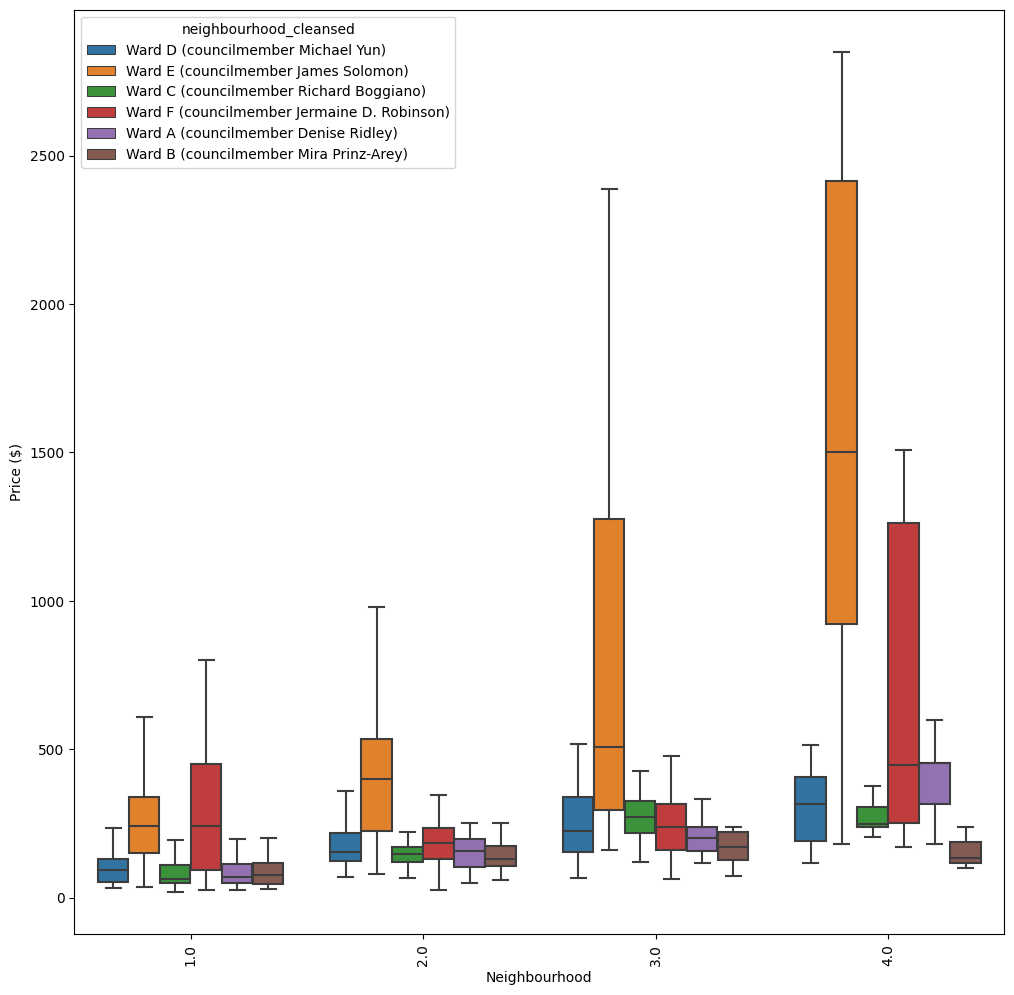

In [35]:
# Boxplots of price per badrooms grouped by Neighbourhoods without outliers
plt.subplots(figsize=(12, 12))
sns.boxplot(x='bedrooms', y='price', hue='neighbourhood_cleansed', data=jc_listings[jc_listings['bedrooms'] <= 4], showfliers = False)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('Neighbourhood');

In [36]:
nyc_listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39025.0,1.168085e+17,2.469739e+17,2539.000000,1.627472e+07,3.829909e+07,5.259389e+07,7.098549e+17
host_listings_count,39025.0,6.938657e+01,4.480869e+02,1.000000,1.000000e+00,2.000000e+00,4.000000e+00,4.022000e+03
host_total_listings_count,39025.0,9.303439e+01,5.769102e+02,1.000000,1.000000e+00,3.000000e+00,6.000000e+00,6.958000e+03
latitude,39025.0,4.072857e+01,5.868834e-02,40.500314,4.068753e+01,4.072399e+01,4.076310e+01,4.092881e+01
longitude,39025.0,-7.394548e+01,5.801695e-02,-74.269520,-7.398319e+01,-7.395356e+01,-7.392533e+01,-7.369006e+01
accommodates,39025.0,2.953850e+00,2.000819e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,35287.0,1.370250e+00,7.365274e-01,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.300000e+01
beds,38210.0,1.644229e+00,1.122478e+00,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.400000e+01
price,39025.0,1.974140e+02,3.514679e+02,10.000000,8.000000e+01,1.310000e+02,2.190000e+02,1.650000e+04
minimum_nights,39025.0,1.904154e+01,3.052722e+01,1.000000,2.000000e+00,1.500000e+01,3.000000e+01,1.250000e+03


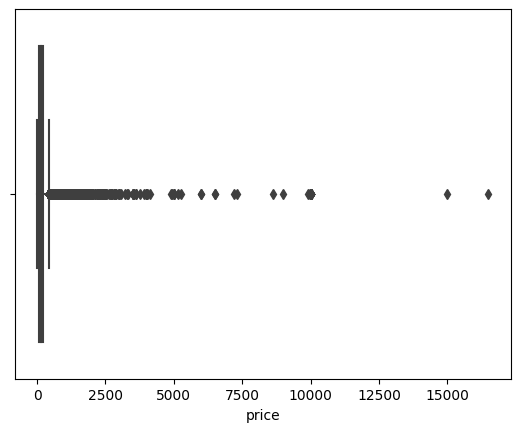

In [37]:
# Identifying outliers

sns.boxplot(x='price', data=nyc_listings)
plt.show()

In [95]:
# There are 34 listings over USD 5000 per night. However it is hard to make a determination if these listings represents outliers. We will remove from the data set two listings priced above 12000.

nyc_listings = nyc_listings[nyc_listings['price'] <= 12000]  # filter for price bellow 12K

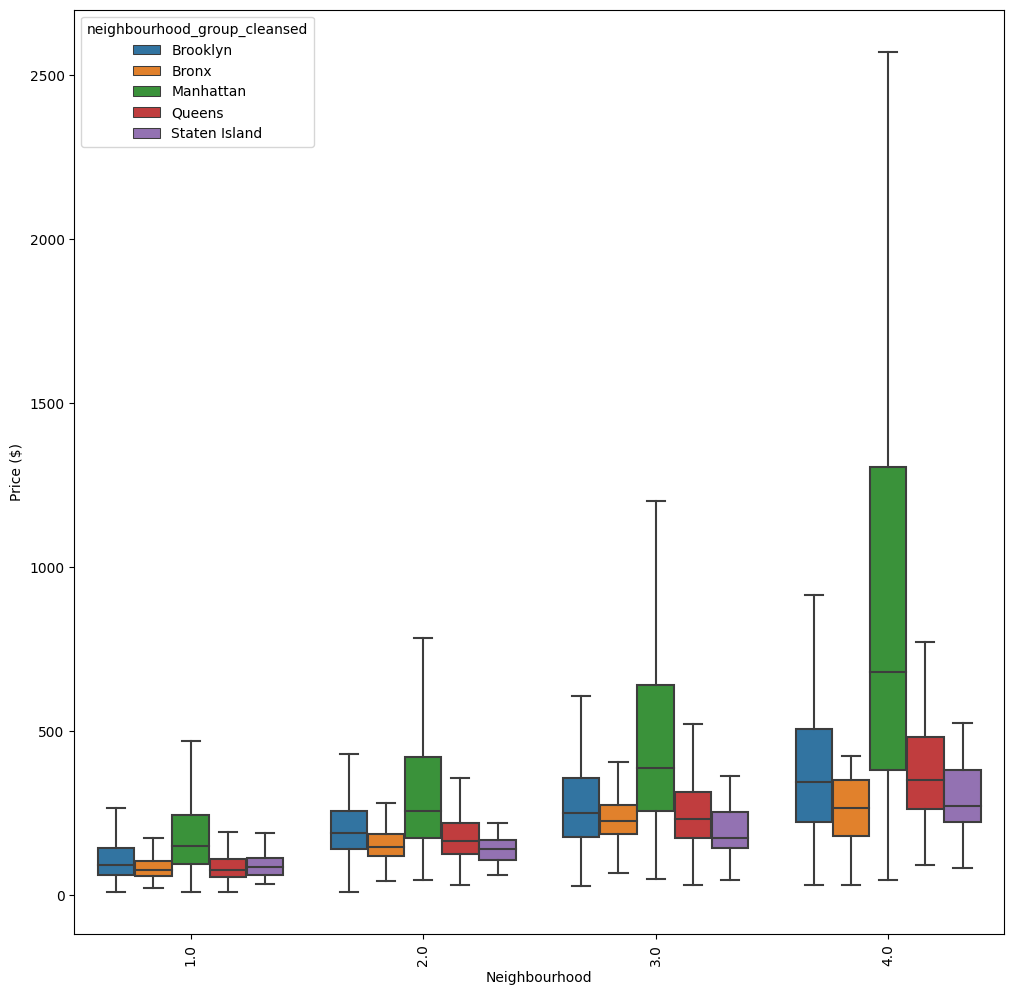

In [38]:
# Boxplots of price per badrooms grouped by Neighbourhoods without outliers
plt.subplots(figsize=(12, 12))
sns.boxplot(x='bedrooms', y='price', hue='neighbourhood_group_cleansed', data=nyc_listings[nyc_listings['bedrooms'] <= 4], showfliers = False)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('Neighbourhood');

In [39]:
rio_listings.describe().T

,count,mean,std,min,25%,50%,75%,max
id,25767.0,1.470974e+17,2.729631e+17,17878.00000,1.413710e+07,4.039398e+07,5.395124e+07,7.202227e+17
host_listings_count,25767.0,1.443117e+01,6.307763e+01,1.00000,1.000000e+00,2.000000e+00,5.000000e+00,7.260000e+02
host_total_listings_count,25767.0,2.466884e+01,1.009231e+02,1.00000,1.000000e+00,2.000000e+00,7.000000e+00,1.013000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,25767.0,-2.296766e+01,3.565866e-02,-23.07375,-2.298494e+01,-2.297318e+01,-2.295629e+01,-2.274969e+01
longitude,25767.0,-4.325370e+01,1.013277e-01,-43.77038,-4.332126e+01,-4.319775e+01,-4.318677e+01,-4.310440e+01
accommodates,25767.0,4.129313e+00,2.413955e+00,1.00000,2.000000e+00,4.000000e+00,5.000000e+00,1.600000e+01
bedrooms,24469.0,1.703625e+00,1.088804e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,4.700000e+01
beds,25553.0,2.552655e+00,2.096672e+00,1.00000,1.000000e+00,2.000000e+00,3.000000e+00,9.100000e+01
price,25767.0,7.618433e+02,3.784474e+03,33.00000,1.890000e+02,3.100000e+02,6.080000e+02,3.351030e+05


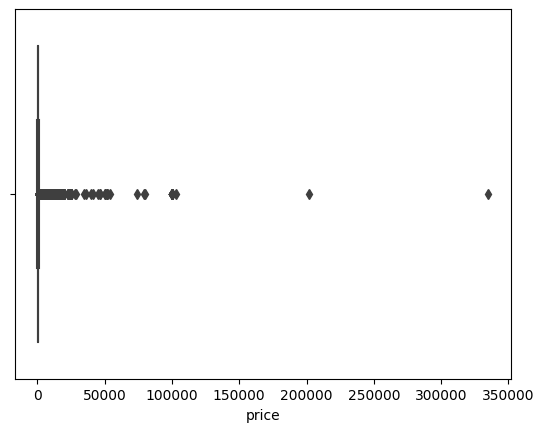

In [40]:
# Identifying outliers

sns.boxplot(x='price', data=rio_listings)
plt.show()

In [105]:
# There are 49 listings price over BRL 25,000, which is roughly USD 5,000. We will delete these listings from Rio data set

rio_listings = rio_listings[rio_listings['price'] <= 25000] # filters for listings bellow BRL 25,000.

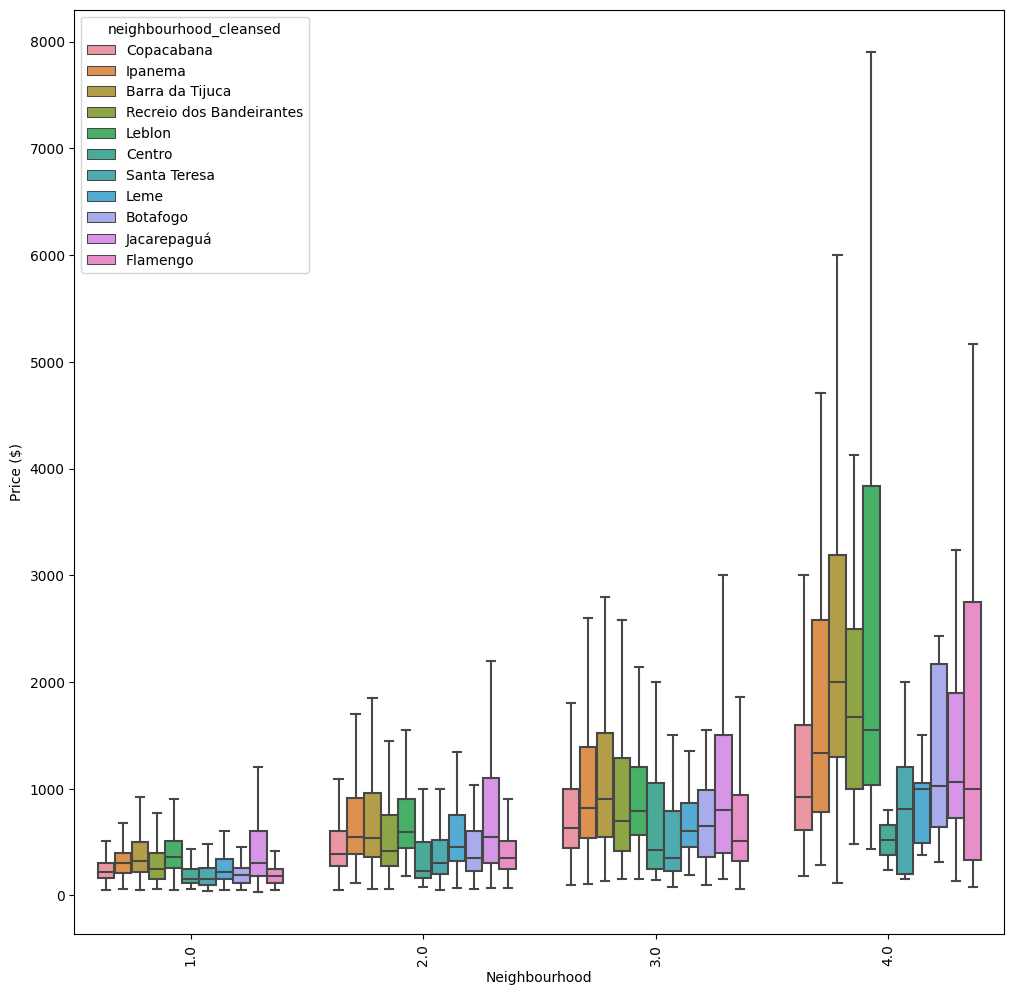

In [41]:
# Rio listing has too many neighbourhoods to present in a regular seaborn boxplot

df = rio_listings.groupby('neighbourhood_cleansed').size().reset_index(name='count')
df_neighbours = df[df['count'] >= 450].neighbourhood_cleansed # 11 neighbourhoods with at least 450 listings


data_rio = rio_listings[rio_listings['neighbourhood_cleansed'].isin(df_neighbours)]

# Boxplots of price per badrooms grouped by selected Neighbourhoods without outliers
plt.subplots(figsize=(12, 12))
sns.boxplot(x='bedrooms', y='price', hue='neighbourhood_cleansed', data=data_rio[data_rio['bedrooms'] <= 4], showfliers = False)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('Neighbourhood');

The boxplot charts and descriptive statistics show that neighbourhood affects price. For some neighbourhoods the is a price range.

While analyzing the price per neighbourhood information, we noticed there are several listing with very high minimmum nights and/or zero to little availability in the next 365 days. We will delete listings with minimum nights above 30 days and availability for the next 365 days of 10 days or less.

In [42]:
# Deleting listing that request more than 30 days as minimum nights and have fewer than 10 days available for the next 365 days.

jc_listings = jc_listings[(jc_listings['minimum_nights'] <=30) & (jc_listings['availability_365'] >=10)] # 2,028
nyc_listings = nyc_listings[(nyc_listings['minimum_nights'] <=30) & (nyc_listings['availability_365'] >=10)] # 22,618
rio_listings = rio_listings[(rio_listings['minimum_nights'] <=30) & (rio_listings['availability_365'] >=10)] # 23,248

We will save the data in pickel format for Exploratory Data Analysis and Model construction

In [43]:
# saving data for further work
path_data = '../Data/'


jc_listings.to_pickle(path_data+'jc_listings.pkl')
jc_calendar.to_pickle(path_data+'jc_calendar.pkl')
jc_locale.to_pickle(path_data+'jc_locale.pkl')
jc_reviews.to_pickle(path_data+'jc_reviews.pkl')

nyc_listings.to_pickle(path_data+'nyc_listings.pkl')
nyc_calendar.to_pickle(path_data+'nyc_calendar.pkl')
nyc_locale.to_pickle(path_data+'nyc_locale.pkl')
nyc_reviews.to_pickle(path_data+'nyc_reviews.pkl')

rio_listings.to_pickle(path_data+'rio_listings.pkl')
rio_calendar.to_pickle(path_data+'rio_calendar.pkl')
rio_locale.to_pickle(path_data+'rio_locale.pkl')
rio_reviews.to_pickle(path_data+'rio_reviews.pkl')